In [1]:
import Initializer, Mutator, Recombiner,Selector, Replacer, Terminator, LocalSearcher
from GeneticAlgorithm import GeneticAlgorithm
from ProblemDefinition import ProblemDefinition
from Benchmark import Benchmark
import EvolutionPlotter as ep

In [2]:
# Choose your operators
initializer = Initializer.RandomInitializer()

tournamentSelectorStat = Selector.TournamentSelector(s=20, dynAdapt=False)
tournamentSelectorDyn = Selector.TournamentSelector(s=20, dynAdapt=True)
rouletteSelector = Selector.RouletteSelector()

crossoverRecombiner = Recombiner.CrossoverRecombiner()
uniformcrossoverRecombiner = Recombiner.UniformCrossoverRecombiner()

randomMutatorStat = Mutator.RandomMutator(0.1, dynAdapt=False)
randomMutatorDyn = Mutator.RandomMutator(0.1, dynAdapt=True)
swapMutator = Mutator.SwapMutator()

bottomReplacer = Replacer.bottomReplacer()
deleteallReplacer = Replacer.deleteAllReplacer()

iterationTerminator = Terminator.maxItTerminator(100)

# Local searcher
idleSearcher = LocalSearcher.Idle()
hillSearcher = LocalSearcher.HillClimber()

# Set up example problems
nrMachines, jobRuntimes = Benchmark.benchmark1()
probDef1 = ProblemDefinition(nrMachines, jobRuntimes)

nrMachines, jobRuntimes = Benchmark.benchmark2()
probDef2 = ProblemDefinition(nrMachines, jobRuntimes)

nrMachines, jobRuntimes = Benchmark.benchmark3()
probDef3 = ProblemDefinition(nrMachines, jobRuntimes)

# Set up GA parameters
popSize = 100
nrOffspring = int(popSize/5)

## Compare with / without local search

### Without local search - Problem 1

In [3]:
# Create Genetic Algorithm instance
runtimeTerminator = Terminator.maxRuntimeTerminator(20)
ga = GeneticAlgorithm(initializer, rouletteSelector, uniformcrossoverRecombiner,
                      swapMutator, bottomReplacer, runtimeTerminator,
                      probDef1, popSize, nrOffspring, idleSearcher)

bestIndividual, results = ga.run()
print("best Individuals fitness: ", bestIndividual.fitness)

best Individuals fitness:  0.00034614053305642093


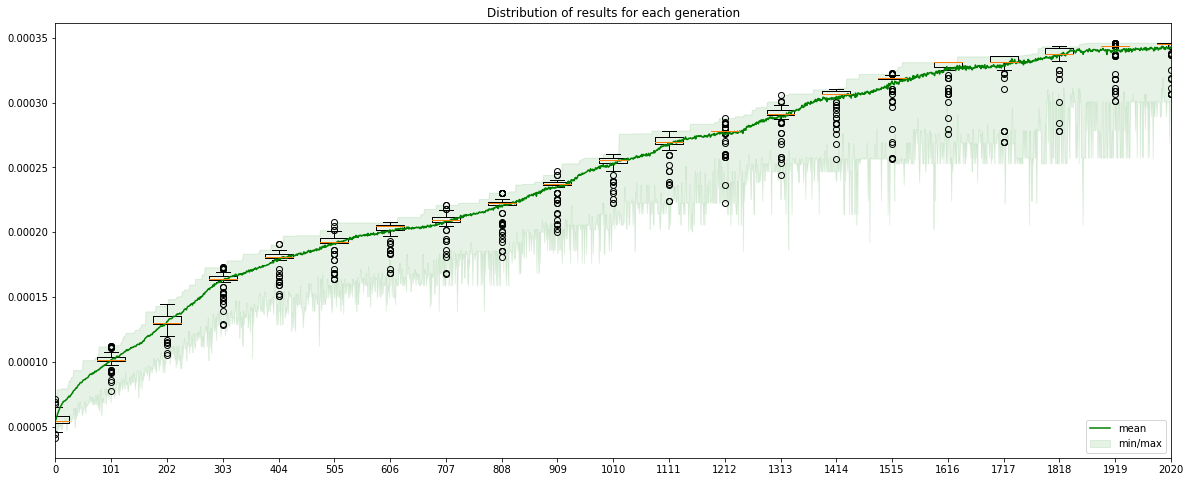

In [4]:
ep.plot_evolution(results, 20)

### With local search - Problem 1

In [7]:
# Create Genetic Algorithm instance
runtimeTerminator = Terminator.maxRuntimeTerminator(20)
ga = GeneticAlgorithm(initializer, rouletteSelector, uniformcrossoverRecombiner,
                      swapMutator, bottomReplacer, runtimeTerminator,
                      probDef1, popSize, nrOffspring, hillSearcher)

bestIndividual, results = ga.run()
print("best Individuals fitness: ", bestIndividual.fitness)

best Individuals fitness:  8.411843876177658e-05


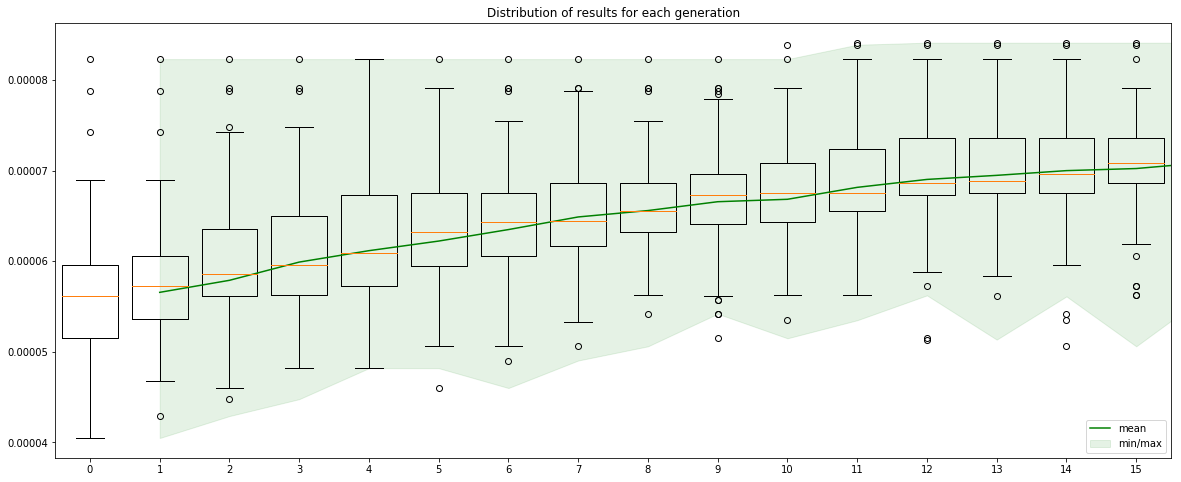

In [13]:
ep.plot_evolution(results, 10)

### Without local search - Problem 2

In [14]:
# Create Genetic Algorithm instance
runtimeTerminator = Terminator.maxRuntimeTerminator(20)
ga = GeneticAlgorithm(initializer, rouletteSelector, uniformcrossoverRecombiner,
                      swapMutator, bottomReplacer, runtimeTerminator,
                      probDef2, popSize, nrOffspring, idleSearcher)

bestIndividual, results = ga.run()
print("best Individuals fitness: ", bestIndividual.fitness)

best Individuals fitness:  0.00029120559114735004


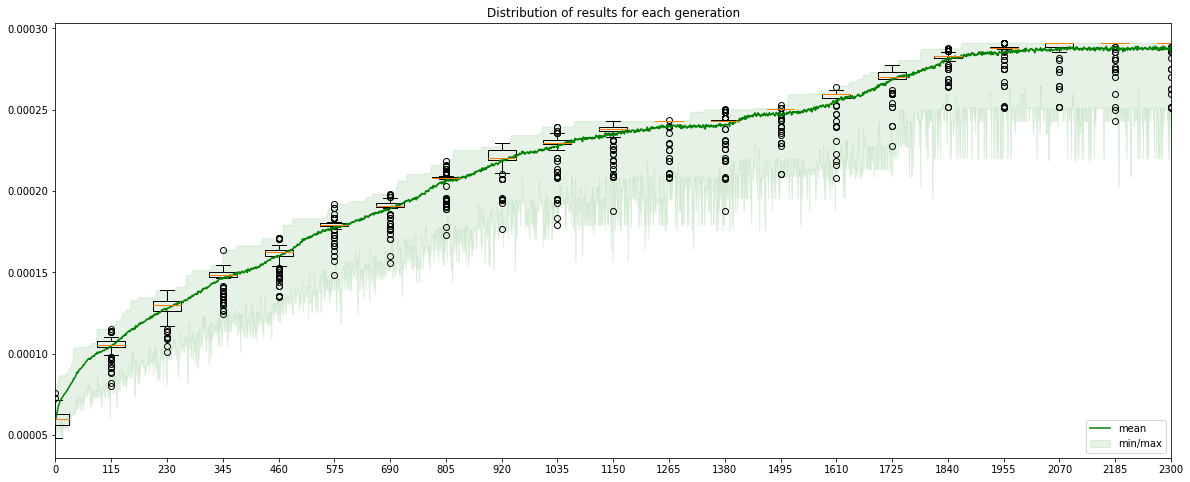

In [15]:
ep.plot_evolution(results, 20)

### With local search - Problem 2

In [16]:
# Create Genetic Algorithm instance
runtimeTerminator = Terminator.maxRuntimeTerminator(20)
ga = GeneticAlgorithm(initializer, rouletteSelector, uniformcrossoverRecombiner,
                      swapMutator, bottomReplacer, runtimeTerminator,
                      probDef2, popSize, nrOffspring, hillSearcher)

bestIndividual, results = ga.run()
print("best Individuals fitness: ", bestIndividual.fitness)

best Individuals fitness:  8.802816901408451e-05


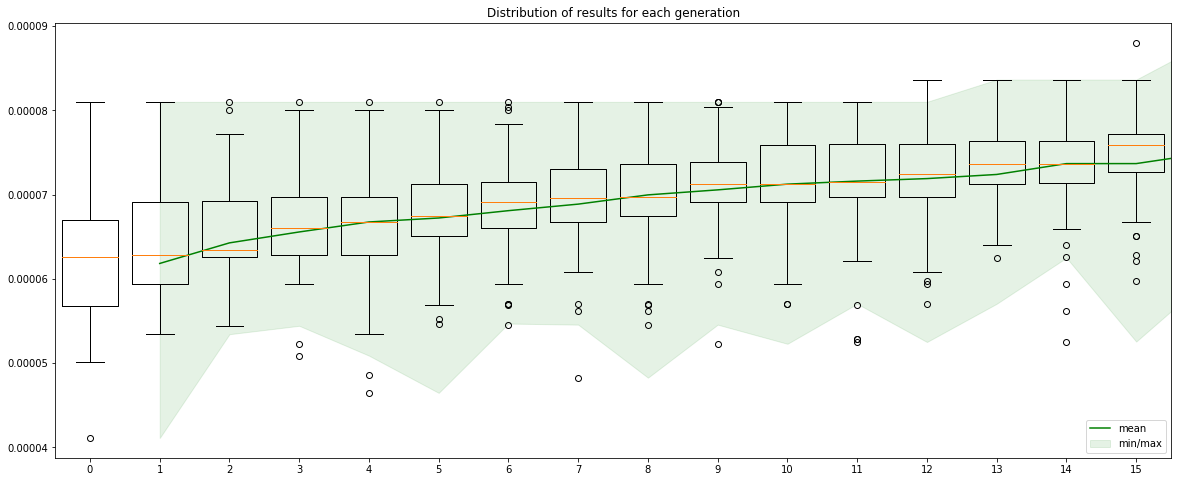

In [17]:
ep.plot_evolution(results, 10)

### Without local search - Problem 3

In [18]:
# Create Genetic Algorithm instance
runtimeTerminator = Terminator.maxRuntimeTerminator(20)
ga = GeneticAlgorithm(initializer, rouletteSelector, uniformcrossoverRecombiner,
                      randomMutatorDyn, bottomReplacer, runtimeTerminator,
                      probDef3, popSize, nrOffspring, idleSearcher)

bestIndividual, results = ga.run()
print("best Individuals fitness: ", bestIndividual.fitness)

best Individuals fitness:  0.005208333333333333


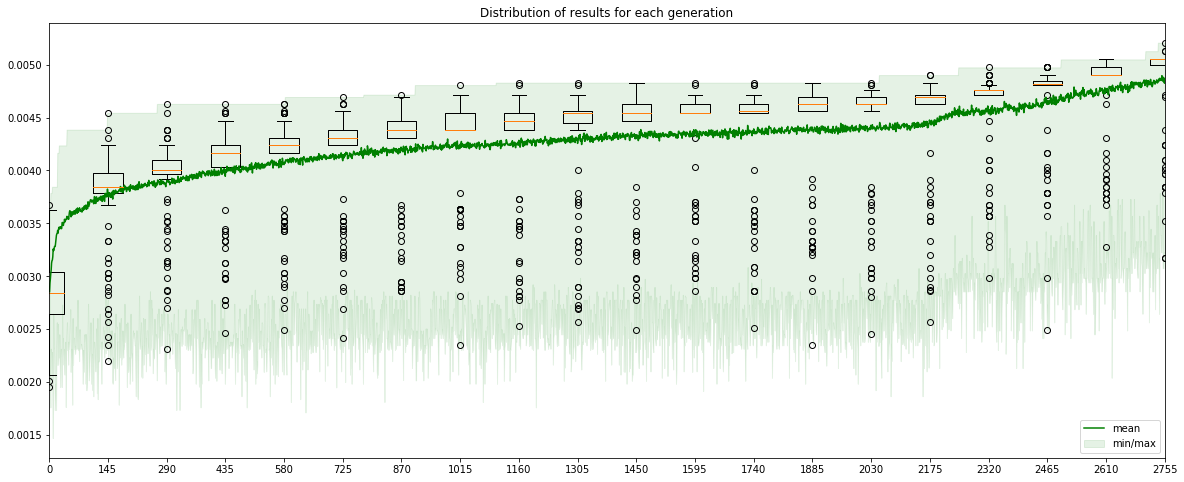

In [19]:
ep.plot_evolution(results, 20)

### With local search - Problem 3

In [20]:
# Create Genetic Algorithm instance
runtimeTerminator = Terminator.maxRuntimeTerminator(20)
ga = GeneticAlgorithm(initializer, rouletteSelector, uniformcrossoverRecombiner,
                      randomMutatorDyn, bottomReplacer, runtimeTerminator,
                      probDef3, popSize, nrOffspring, hillSearcher)

bestIndividual, results = ga.run()
print("best Individuals fitness: ", bestIndividual.fitness)

best Individuals fitness:  0.004694835680751174


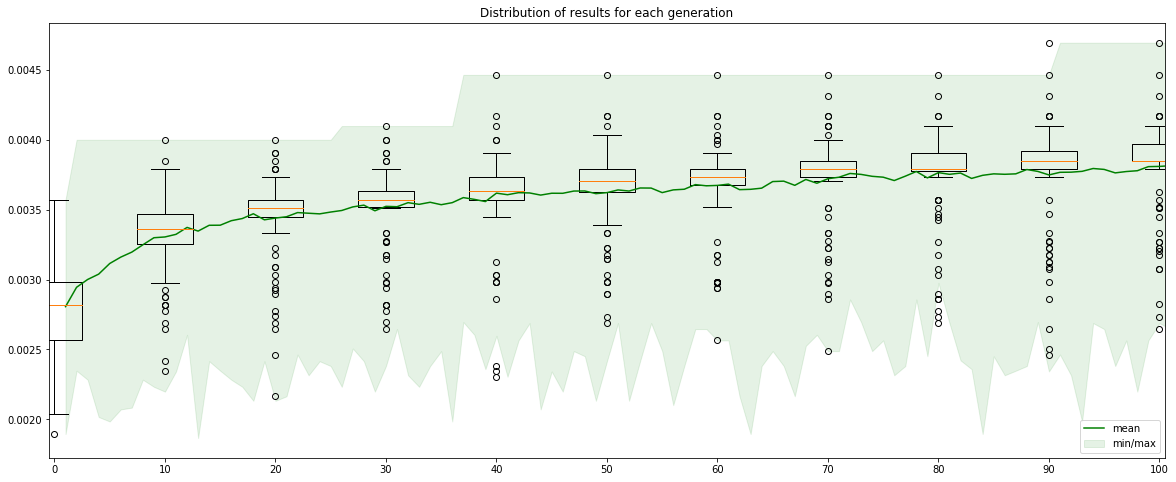

In [21]:
ep.plot_evolution(results, 10)